In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt

In [2]:
college_df = pd.read_csv('Resources/salaries_by_college_type_data.csv')
region_df = pd.read_csv('Resources/salaries_by_region_data.csv')
majors_df = pd.read_csv('Resources/degrees_that_pay_back_data.csv')

datasets_list = [college_df, region_df, majors_df]

In [3]:
college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

college_df.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "name",
    "Region" : "region",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

region_df.rename(columns=region_columns, inplace=True)

majors_columns = {
    "Undergraduate Major" : "name",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

majors_df.rename(columns=majors_columns, inplace=True)

In [4]:
selected_columns = ["start_p50", "mid_p50", "mid_p10", "mid_p25", "mid_p75", "mid_p90"]

for dataset in datasets_list:
    for column in selected_columns:
        dataset[column] = dataset[column].str.replace("$","")
        dataset[column] = dataset[column].str.replace(",","")
        dataset[column] = pd.to_numeric(dataset[column])

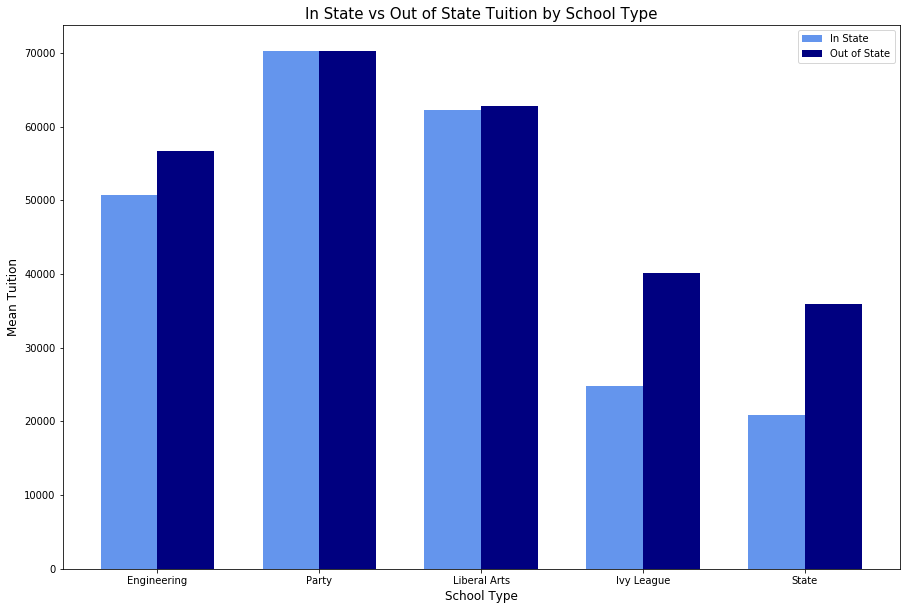

In [6]:
# TUITIONS BY SCHOOL TYPE

in_state_type = college_df.groupby("type")["in_tuition"].mean()

out_state_type = college_df.groupby("type")["out_tuition"].mean()

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,10))
instate = ax.bar(index, in_state_type, bar_width,
                label="In State", color="cornflowerblue")

outstate = ax.bar(index+bar_width, out_state_type,
                 bar_width, label="Out of State", color="navy")

ax.set_xlabel('School Type', size =12)
ax.set_ylabel('Mean Tuition', size=12)
ax.set_title('In State vs Out of State Tuition by School Type', size=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Engineering","Party", "Liberal Arts", "Ivy League","State"])
ax.legend()

plt.savefig("Images/In State vs Out of State Tuition by School Type.png")
plt.show()

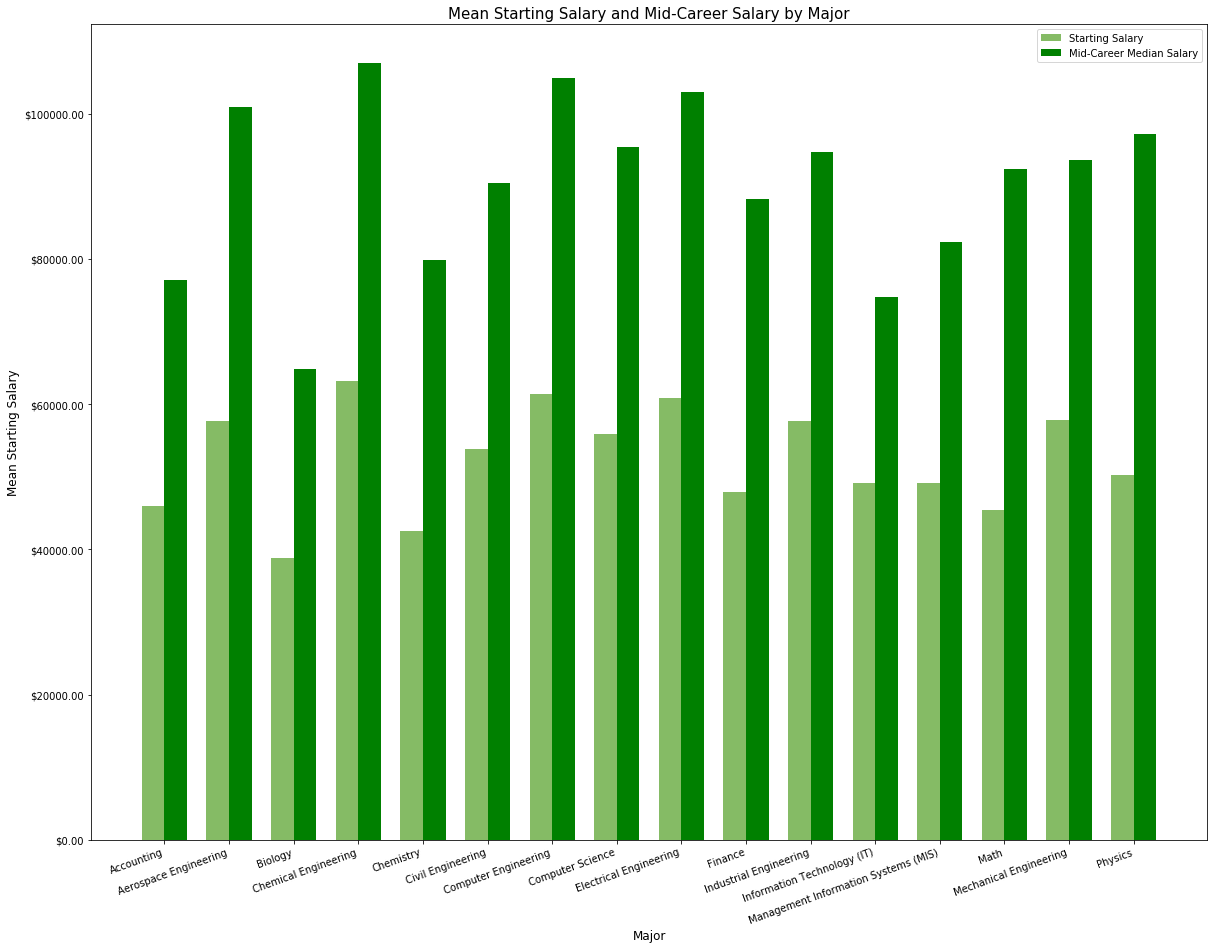

In [7]:
# STARTING SALARIES FOR STEM: second graph

index = np.arange(16)
bar_width = 0.35

formatter = ticker.FormatStrFormatter('$%1.2f')

fig, ax = plt.subplots(1,1,figsize=(20,15))
st_salary = ax.bar(index, majors_df["start_p50"], bar_width,
                label="Starting Salary", color="#85bb65")
med_salary = ax.bar(index+bar_width, majors_df["mid_p50"],
                 bar_width, label="Mid-Career Median Salary", color="green")

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Major', size=12)
ax.set_ylabel('Mean Starting Salary', size=12)
ax.set_title('Mean Starting Salary and Mid-Career Salary by Major', size=15)
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation = 20)
ax.set_xticklabels(majors_df["name"], ha="right")
ax.legend()

plt.savefig("Images/Mean Starting Salary and Mid-Career Salary by Major.png")
plt.show()

In [8]:
# Created new df with only Top 8 school names and out of state tuition for next graph
school_tuition_df = college_df.loc[0:9, ["name", "out_tuition"]]
school_tuition_df.drop(index=[3,4], inplace=True)
school_tuition_df


,name,out_tuition
0,Massachusetts Institute of Technology (MIT),67342.0
1,California Institute of Technology (CIT),67887.0
2,Harvey Mudd College,75003.0
5,Worcester Polytechnic Institute (WPI),65304.0
6,Carnegie Mellon University (CMU),69883.0
7,Rensselaer Polytechnic Institute (RPI),69140.0
8,Georgia Institute of Technology,44904.0
9,Colorado School of Mines,51753.0


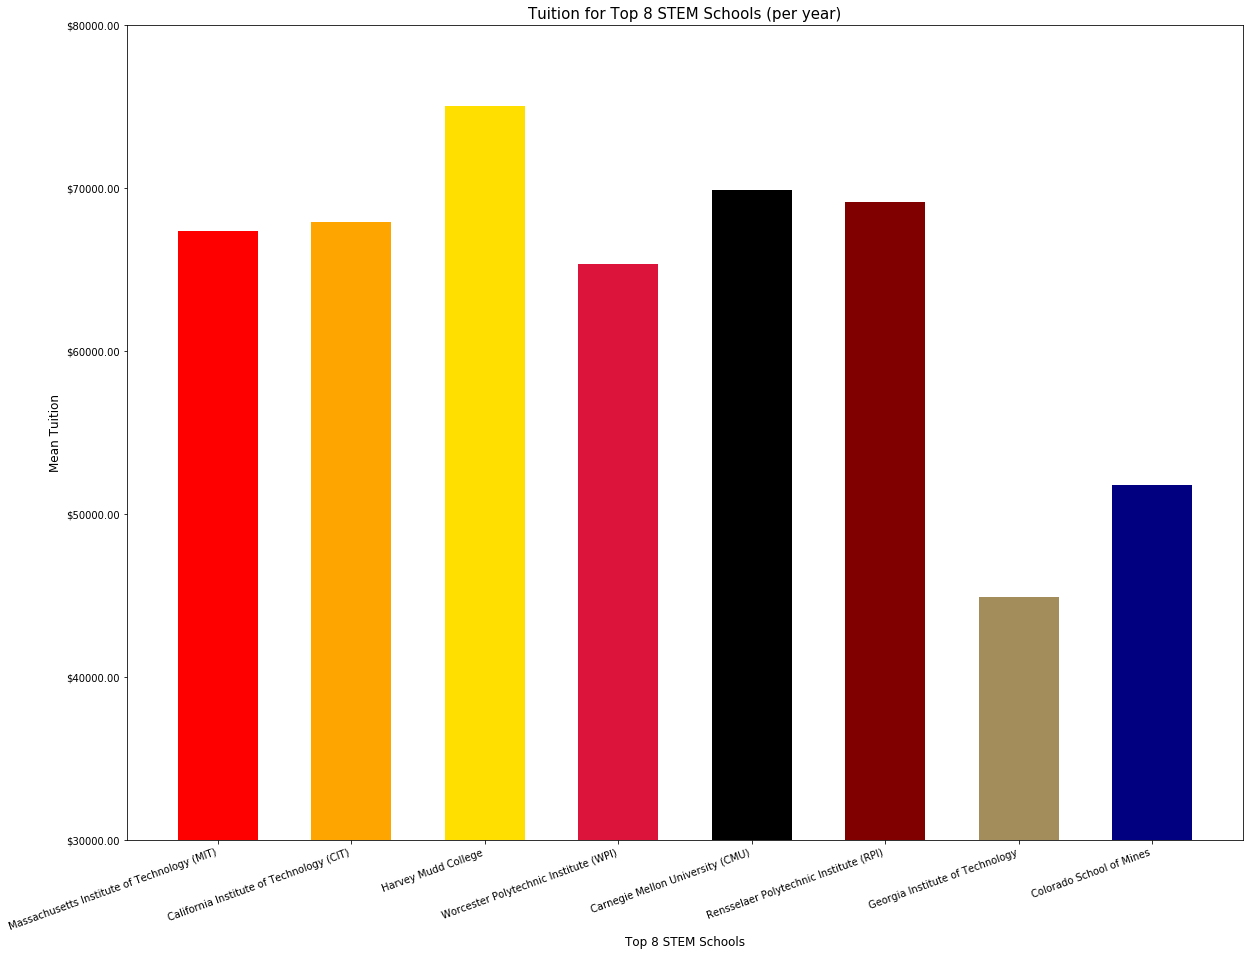

In [9]:
# TUITION FOR TOP STEM SCHOOLS (per one year)

index = np.arange(8)
bar_width = 0.60
 
fig, ax = plt.subplots(1,1,figsize=(20,15))

formatter = ticker.FormatStrFormatter('$%1.2f')

out_of_state_tuition = ax.bar(index, school_tuition_df["out_tuition"], bar_width, label=None,
                              color=["red","orange","#ffdf00","crimson","black","maroon","#a28d5b","navy"])


ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Mean Tuition', size =12)
ax.set_title('Tuition for Top 8 STEM Schools (per year)', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="right")
plt.xticks(rotation = 20)
plt.ylim(30000, 80000)

plt.savefig("Images/Tuition for Top 8 STEM Schools.png")
plt.show()

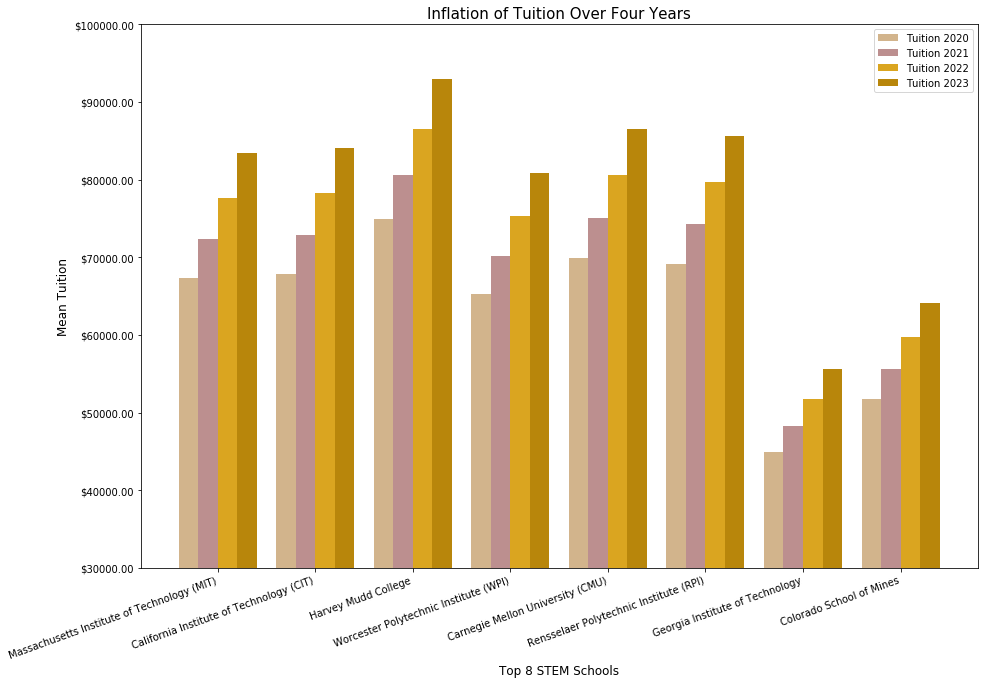

In [10]:
# INFLATION RATE OF TUITION OVER 4 years

index = np.arange(8)
bar_width = 0.20

tuition2= school_tuition_df["out_tuition"]*1.074
tuition3 = tuition2*1.074
tuition4 = tuition3*1.074
 
fig, ax = plt.subplots(1,1,figsize=(15,10))

formatter = ticker.FormatStrFormatter('$%1.2f')

twenty_twenty = ax.bar(index, school_tuition_df["out_tuition"], bar_width, label="Tuition 2020",
                              color=["tan"])
twenty_twenty_one = ax.bar(index + bar_width, tuition2, bar_width, label="Tuition 2021",
                              color=["rosybrown"])
twenty_twenty_two = ax.bar(index + bar_width*2, tuition3, bar_width, label="Tuition 2022",
                              color=["goldenrod"])
twenty_twenty_three = ax.bar(index + bar_width*3, tuition4, bar_width, label="Tuition 2023",
                              color=["darkgoldenrod"])

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Mean Tuition', size =12)
ax.set_title('Inflation of Tuition Over Four Years', size =15)
ax.set_xticks(index + bar_width*1.5 )
ax.set_xticklabels(school_tuition_df["name"], ha="right")
plt.xticks(rotation = 20)
plt.ylim(30000, 100000)
ax.legend()

plt.savefig("Images/Tuition Inflation for Top 8 STEM Schools.png")
plt.show()

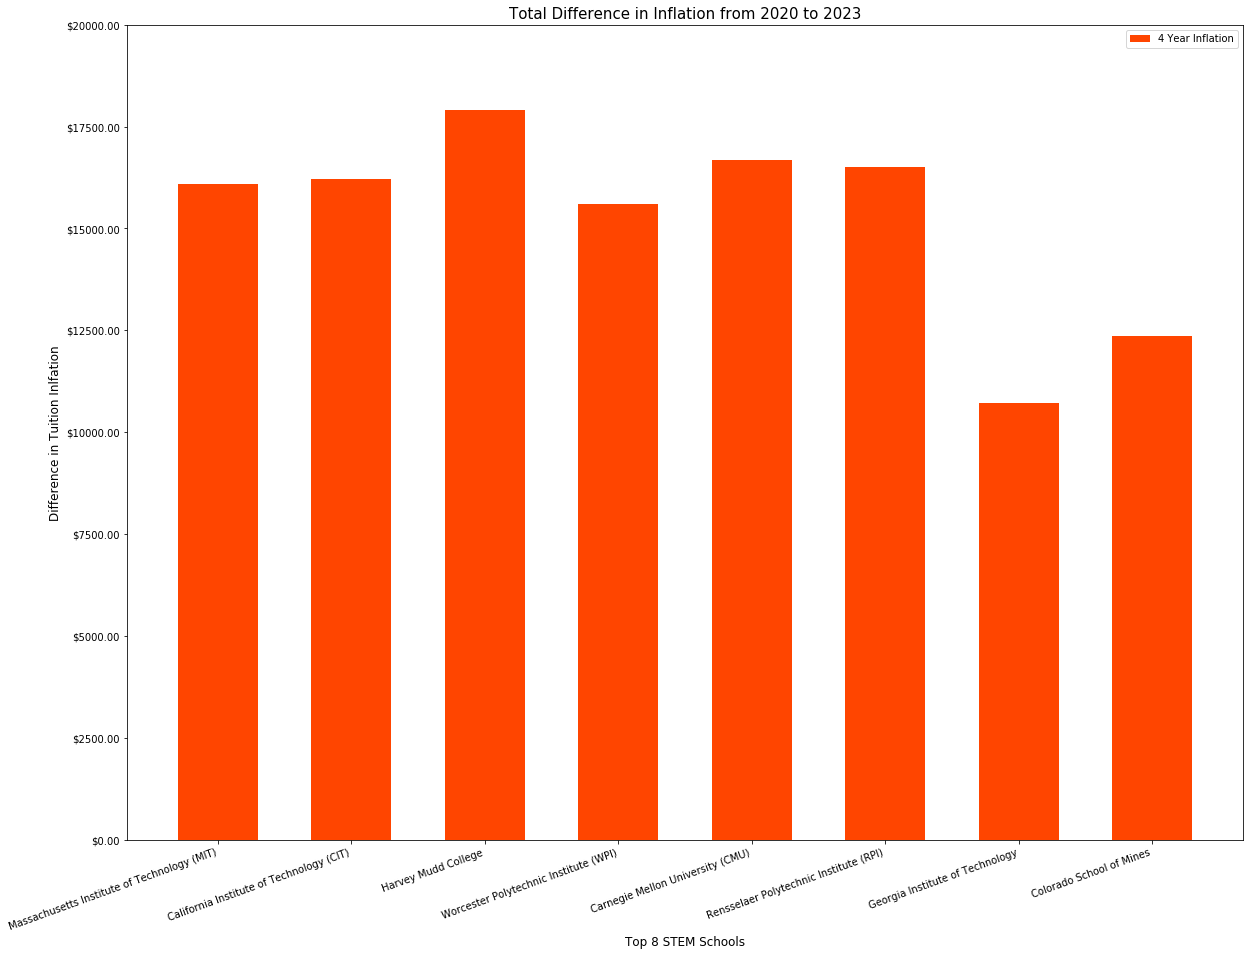

In [11]:
# INFLATION DIFFERENCE - waht you pay for ONLY inflation

index = np.arange(8)
bar_width = 0.60

inflation_diff = tuition4 - (school_tuition_df["out_tuition"])
 
fig, ax = plt.subplots(1,1,figsize=(20,15))

formatter = ticker.FormatStrFormatter('$%1.2f')

inflation = ax.bar(index, inflation_diff, bar_width, label="4 Year Inflation",
                              color="orangered")


ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Difference in Tuition Inlfation', size =12)
ax.set_title('Total Difference in Inflation from 2020 to 2023', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="right")
plt.xticks(rotation = 20)
plt.ylim(0, 20000)
ax.legend()

plt.savefig("Images/Difference in Tuition Inflation for Top 8 STEM Schools.png")
plt.show()

In [12]:
inflation_diff.median()

16148.589024148008

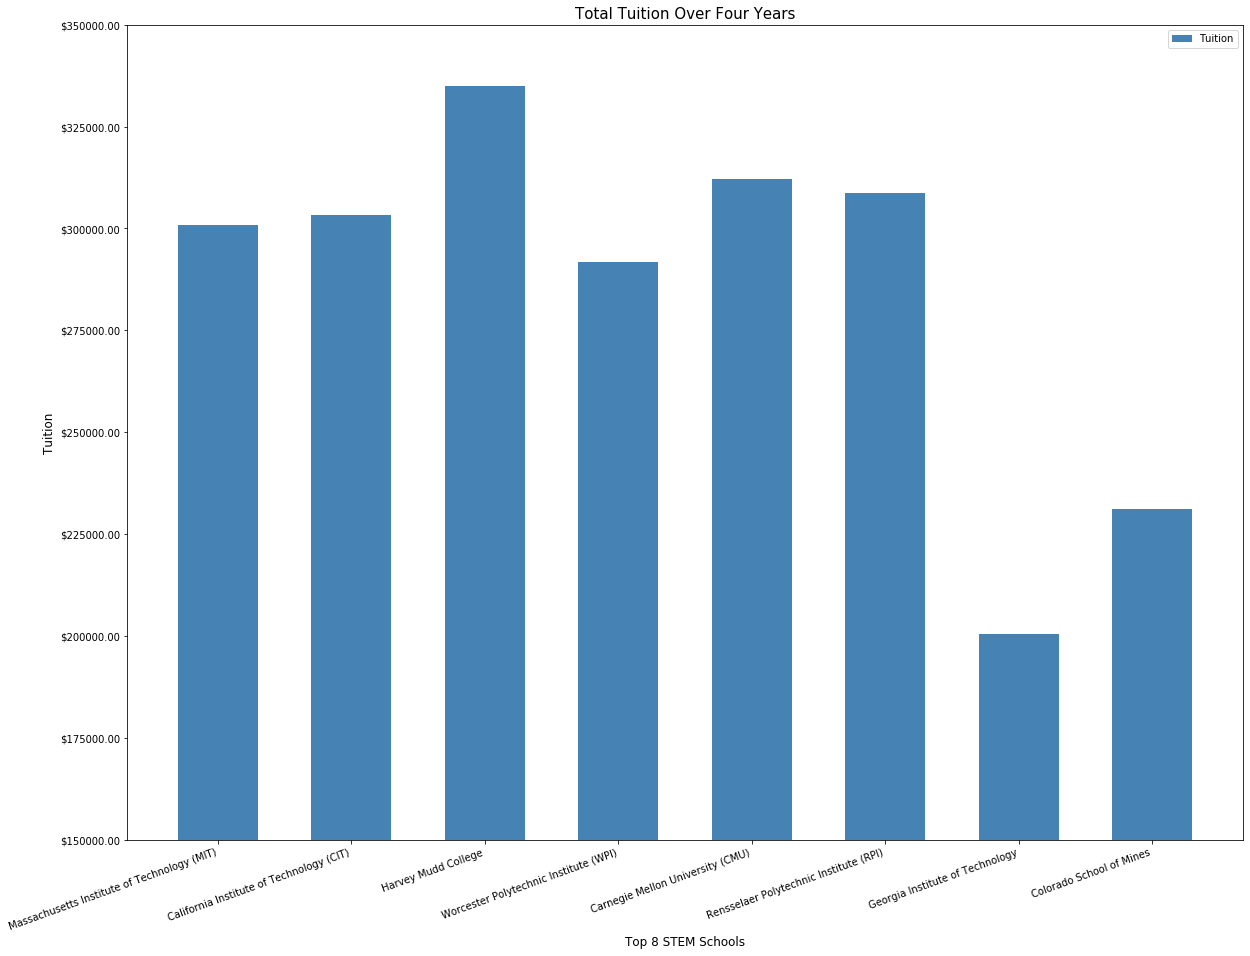

In [13]:
# TOTAL TUITION COST (4 years)

index = np.arange(8)
bar_width = 0.60

total_tuition = school_tuition_df["out_tuition"] + tuition2 + tuition3 + tuition4
 
fig, ax = plt.subplots(1,1,figsize=(20,15))

formatter = ticker.FormatStrFormatter('$%1.2f')

total_tuition_graph = ax.bar(index, total_tuition, bar_width, label="Tuition",
                              color=["steelblue"])

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Tuition', size =12)
ax.set_title('Total Tuition Over Four Years', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="right")
plt.xticks(rotation = 20)
plt.ylim(150000, 350000)
ax.legend()

plt.savefig("Images/Total Tuition for Top 8 STEM Schools.png")
plt.show()

In [14]:
total_tuition


0    300770.195763
1    303204.334290
2    334986.590728
5    291667.857564
6    312119.087501
7    308800.619747
8    200555.149394
9    231144.901270
Name: out_tuition, dtype: float64

In [15]:
# Created new df with only Top 8 school names and out of state tuition for next graph
school_salary_df = college_df.loc[0:9, ["name", "start_p50", "mid_p50"]]
school_salary_df.drop(index=[3,4], inplace=True)
school_salary_df

,name,start_p50,mid_p50
0,Massachusetts Institute of Technology (MIT),72200.0,126000.0
1,California Institute of Technology (CIT),75500.0,123000.0
2,Harvey Mudd College,71800.0,122000.0
5,Worcester Polytechnic Institute (WPI),61000.0,114000.0
6,Carnegie Mellon University (CMU),61800.0,111000.0
7,Rensselaer Polytechnic Institute (RPI),61100.0,110000.0
8,Georgia Institute of Technology,58300.0,106000.0
9,Colorado School of Mines,58100.0,106000.0


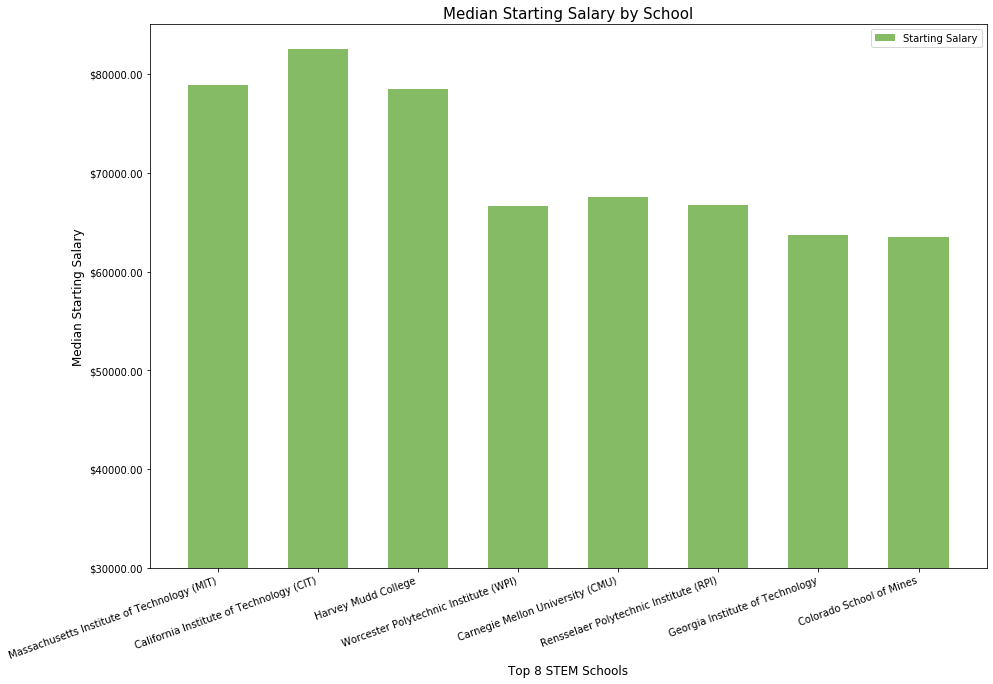

In [16]:
#SALARY BY SCHOOL (STEM) - average inflation was 3% per year 

index = np.arange(8)
bar_width = 0.60

salary1 = school_salary_df["start_p50"]
salary2= salary1*1.03
salary3 = salary2*1.03
graduation_salary = salary3*1.03
 
fig, ax = plt.subplots(1,1,figsize=(15,10))

formatter = ticker.FormatStrFormatter('$%1.2f')

grad_salary = ax.bar(index, graduation_salary, bar_width, label="Starting Salary",
                              color=["#85bb65"])

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Median Starting Salary', size =12)
ax.set_title('Median Starting Salary by School', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_salary_df["name"], ha="right")
plt.xticks(rotation = 20)
plt.ylim(30000, 85000)
ax.legend()

plt.savefig("Images/Median Starting Salary by School.png")
plt.show()


In [17]:
graduation_salary.mean()


70999.93682500001

In [18]:
#Inflation rate for salary df
graduation_salary = salary3*1.03
year2 = graduation_salary*1.06
year3 = year2*1.06
year4 = year3*1.06
year5 = year4*1.06
year6 = year5*1.06
year7 = year6*1.06
year8 = year7*1.06
year9 = year8*1.06
mid_career = year9*1.06

inflation_salary_data =pd.DataFrame({"Name": school_salary_df["name"],
                   "Year_One": graduation_salary, 
                   "Year_Two": year2, 
                   "Year_Three": year3, 
                   "Year_Four": year4, 
                   "Year_Five": year5, 
                   "Year_Six": year6, 
                   "Year_Seven": year7, 
                   "Year_Eight": year8, 
                   "Year_Nine": year9, 
                   "Mid_Career": mid_career})

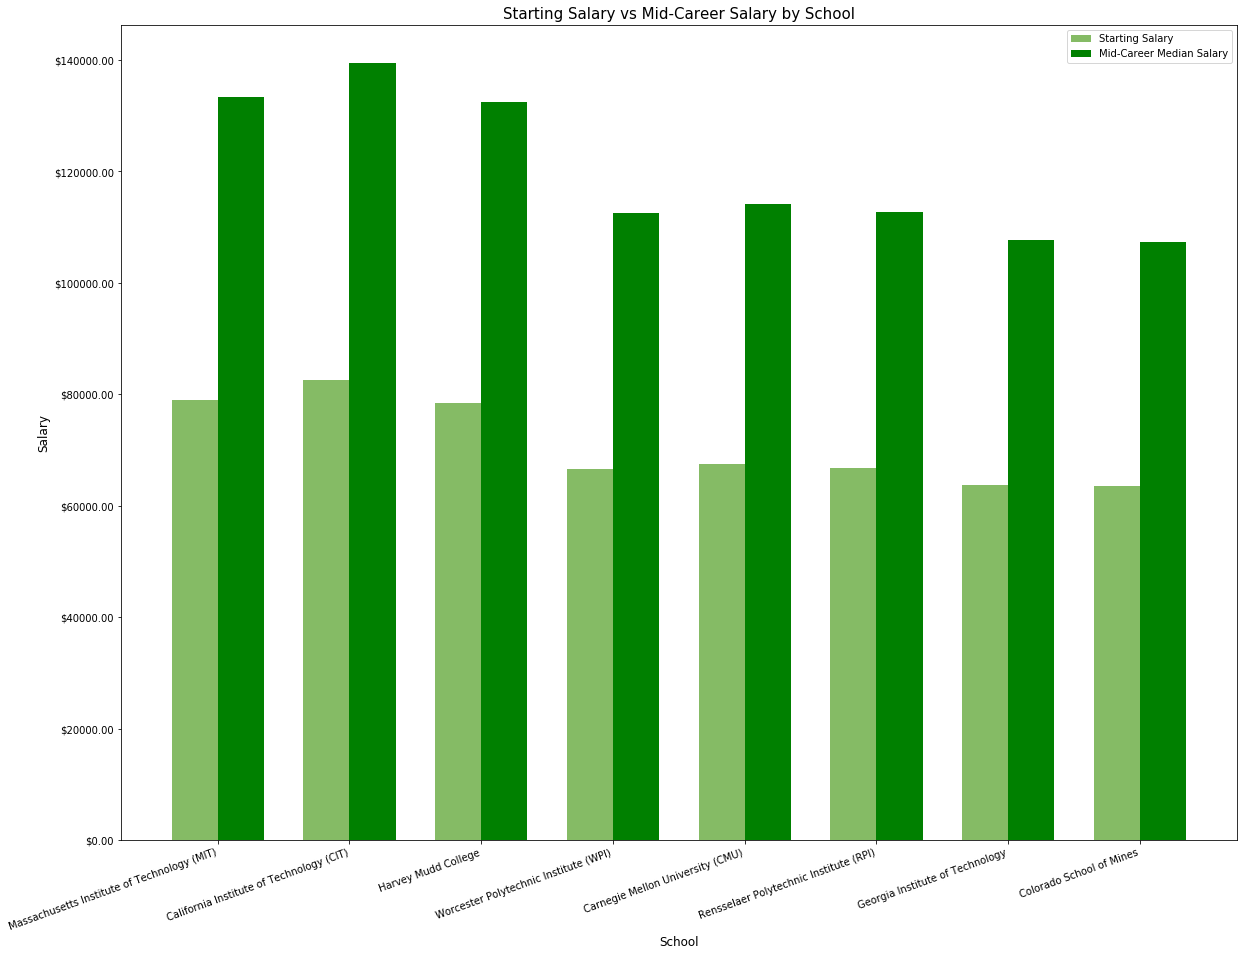

In [19]:
#Starting and Mid-Career Salaries by School
index = np.arange(8)
bar_width = 0.35

formatter = ticker.FormatStrFormatter('$%1.2f')

fig, ax = plt.subplots(1,1,figsize=(20,15))
st_salary = ax.bar(index, inflation_salary_data["Year_One"], bar_width, label="Starting Salary",color="#85bb65")
med_salary = ax.bar(index+bar_width, inflation_salary_data["Mid_Career"],
                 bar_width, label="Mid-Career Median Salary", color="green")

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('School', size=12)
ax.set_ylabel('Salary', size=12)
ax.set_title('Starting Salary vs Mid-Career Salary by School', size=15)
ax.set_xticks(index+bar_width/2)
plt.xticks(rotation = 20)
ax.set_xticklabels(inflation_salary_data["Name"], ha="right")
ax.legend()

plt.savefig("Images/Starting Salary vs. Mid Career Salary.png")

plt.show()

In [20]:
inflation_salary_data["Mid_Career"].mean()

119952.89935635796

In [21]:
#summed salaries for schools and ROI for school type df
inflation_salary_data2 = inflation_salary_data.drop(columns=["Name"])
total_salary = inflation_salary_data2.sum(axis="columns")
ROI_school_df = pd.DataFrame({"Name":inflation_salary_data["Name"],
                              "Total Salary (10 years)": total_salary,
                               "Total Cost of Tuition": total_tuition,
                               "ROI": (total_salary/total_tuition)})
ROI_school_df

,Name,Total Salary (10 years),Total Cost of Tuition,ROI
0,Massachusetts Institute of Technology (MIT),1.039897e+06,300770.195763,3.457448
1,California Institute of Technology (CIT),1.087427e+06,303204.334290,3.586450
2,Harvey Mudd College,1.034136e+06,334986.590728,3.087097
5,Worcester Polytechnic Institute (WPI),8.785836e+05,291667.857564,3.012274
6,Carnegie Mellon University (CMU),8.901060e+05,312119.087501,2.851815
7,Rensselaer Polytechnic Institute (RPI),8.800239e+05,308800.619747,2.849813
8,Georgia Institute of Technology,8.396955e+05,200555.149394,4.186856
9,Colorado School of Mines,8.368149e+05,231144.901270,3.620304


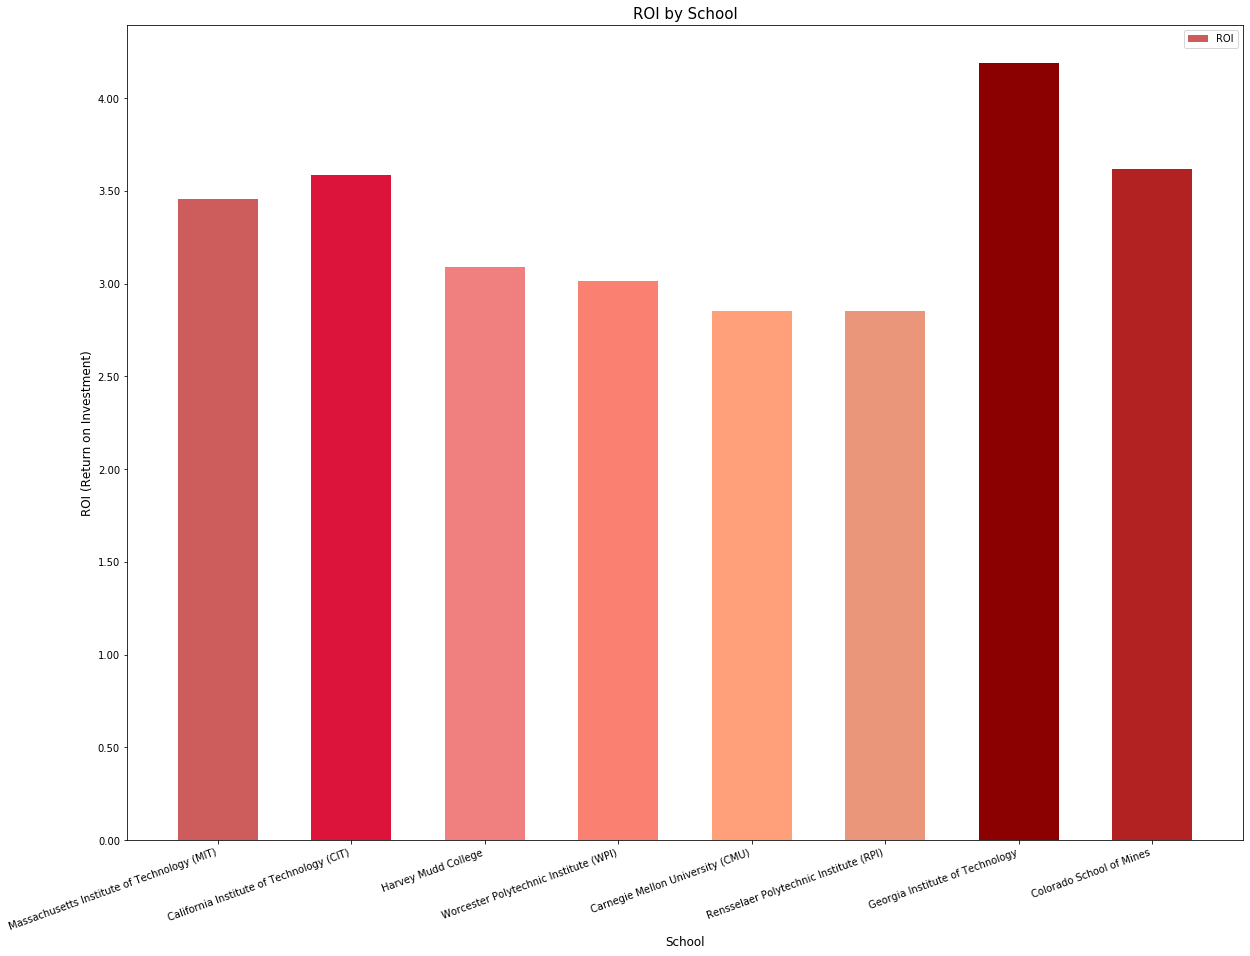

In [22]:
#ROI Values per School

index = np.arange(8)
bar_width = 0.60

formatter = ticker.FormatStrFormatter('%1.2f')

fig, ax = plt.subplots(1,1,figsize=(20,15))
ROI = ax.bar(index, ROI_school_df["ROI"], bar_width, label="ROI",
             color=["indianred","crimson","lightcoral","salmon","lightsalmon","darksalmon",
                    "darkred","firebrick"])


ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('School', size=12)
ax.set_ylabel('ROI (Return on Investment)', size=12)
ax.set_title('ROI by School', size=15)
ax.set_xticks(index)
plt.xticks(rotation = 20)
ax.set_xticklabels(ROI_school_df["Name"], ha="right")
ax.legend()

plt.savefig("Images/ROI by School.png")

plt.show()